## Import Libraries

In [16]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pathlib
import os
import pandas as pd
from collections import Counter


## Import Data Files

In [3]:
path=[]
for dirname, _, filenames in os.walk('/Projects/Movie_Genre_Classification/datasets/Genre Classification Dataset'): #'Projects' is the folder name in which the required files are saved
    for filename in filenames:
        if(pathlib.Path(os.path.join(dirname, filename)).suffix =='.csv'):
           path.append(os.path.join(dirname, filename))

# os.path.splitext(filename)[1] gives extension like pathlib

##### Read the imported files

In [4]:
for filename in path:
    if(os.path.basename(filename)=='train_data.csv'): #filename with extension
        train_set=pd.read_csv(filename) 
    elif(os.path.basename(filename)=='test_data.csv'): 
        test_set=pd.read_csv(filename)
# os.path.splitext(filename)[0] gives full filepath without extension

## Exploratory Data Analysis(EDA)

##### At first get a brief idea of data i.e features

In [5]:
train_set.head(2)#gives first 2 rows of dataset

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...


##### Gather insights of the data now i.e null values

In [6]:
train_set.info()  #gives datatype,count of entries i.e for checking null values in features 
print("\n","="*80,"\n")
test_set.info()
print("\n","="*80,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   DESCRIPTION  54200 non-null  object 
 3   GENRE        0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB




##### Find actual % of null values of all features now

In [7]:
#gives % of null values corresponding to all features
print(100*train_set.isnull().sum()/len(train_set))
print("\n","="*80,"\n")
print(100*test_set.isnull().sum()/len(test_set))

ID             0.0
TITLE          0.0
GENRE          0.0
DESCRIPTION    0.0
dtype: float64


ID               0.0
TITLE            0.0
DESCRIPTION      0.0
GENRE          100.0
dtype: float64


##### Get a better insight of data i.e mean,s.d,percentiles etc.

In [8]:
#gives a vivid insight of data i.e mean,count,max,min,std.50% etc
print(train_set.describe())
print("\n","="*80,"\n")
print(test_set.describe())

                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


                 ID  GENRE
count  54200.000000    0.0
mean   27100.500000    NaN
std    15646.336632    NaN
min        1.000000    NaN
25%    13550.750000    NaN
50%    27100.500000    NaN
75%    40650.250000    NaN
max    54200.000000    NaN


##### Make a copy of actual data

In [9]:
train_set_mod= train_set.copy()
test_set_mod= test_set.copy()

## Data Visualisation

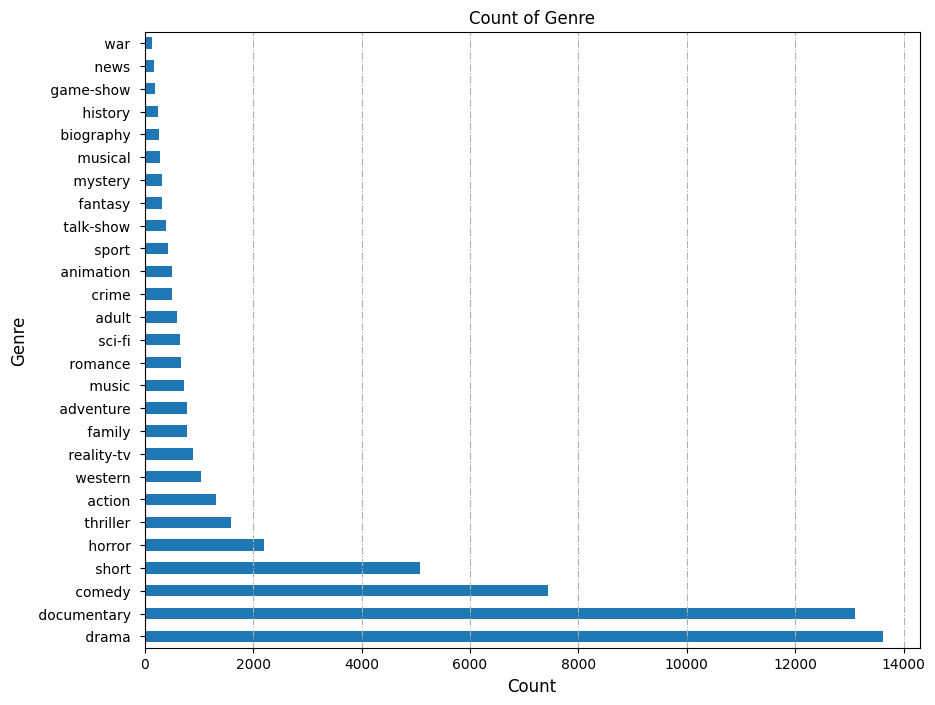

In [10]:
# Assuming you have a pandas DataFrame 'data' with a 'SUBDIVISION' column
genre_counts = train_set_mod["GENRE"].value_counts()

# Create a bar chart
genre_counts.plot(kind='barh', figsize=(10, 8))
plt.xlabel("Count", size=12)
plt.ylabel("Genre", size=12)
plt.title("Count of Genre")
plt.grid(axis="x", linestyle="-.")
plt.show()

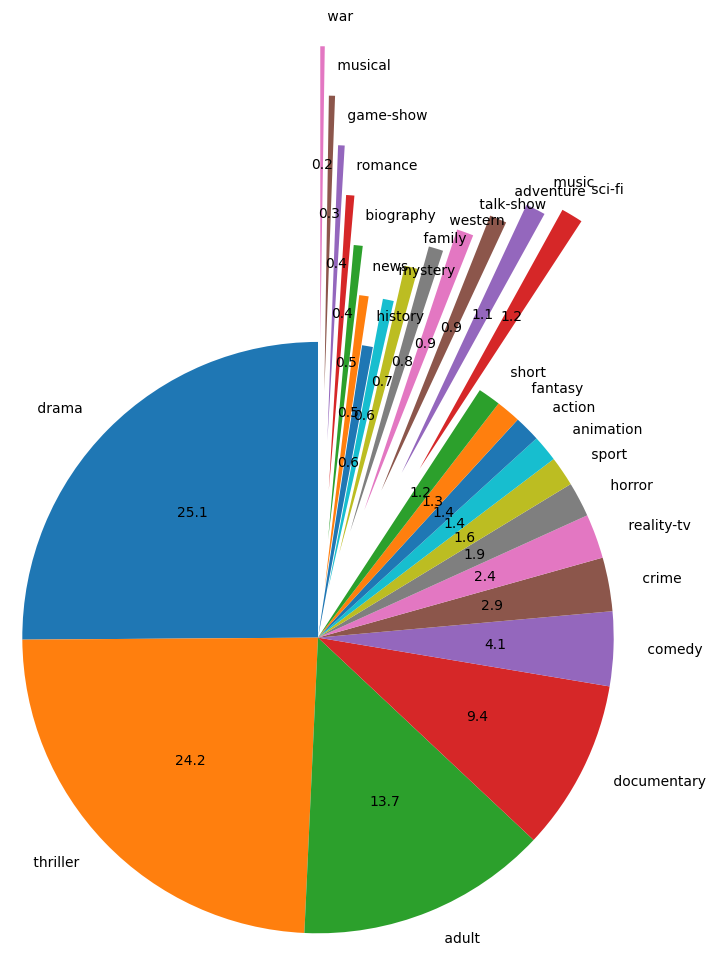

In [15]:
output_categories=train_set_mod['GENRE'].unique()
plt.figure(figsize=(8,8))
values = train_set_mod['GENRE'].value_counts()
plt.pie(values, labels=output_categories, autopct='%1.1f', startangle=90, radius=1.2, explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.75, 0.65, 0.55, 0.45, 0.35, 0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2))
plt.show()



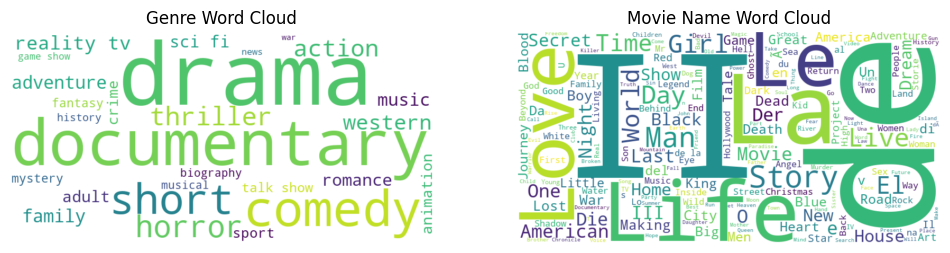

In [ ]:

genre_text = ' '.join(train_set_mod['GENRE'])
movie_name_text = ' '.join(train_set_mod['TITLE'])


genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
movie_name_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_name_text)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.title('Genre Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(movie_name_wordcloud, interpolation='bilinear')
plt.title('Movie Name Word Cloud')
plt.axis('off')

plt.show()

In [17]:
# Now building a corpus which will be a 2d list with 27 rows one row for each genre's description corpus
corpus = []
for i in range(len(train_set_mod['GENRE'].unique())):
    corpus_i = []
    for desc in train_set_mod[train_set_mod['Labeled Genre'] == i]['Processed Description'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)



KeyError: 'Labeled Genre'

In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=3,figsize=(16,30))
plt.subplots_adjust(hspace=0.75)
fig.suptitle('Bar Graphs showing the Most Common words')

for i, l in enumerate(corpus):
    colors = np.random.rand(20, 3)
    ax = axs[i//3,i%3]
    df = pd.DataFrame(Counter(l).most_common(20))
    ax.bar(df[0], df[1], color=colors)
    ax.set_title(le.inverse_transform([i])[0])

    # Setting tick positions and labels
    ax.set_xticks(np.arange(len(df[0])))
    ax.set_xticklabels(df[0].tolist(),rotation=90)

plt.xticks(rotation='vertical')
plt.show()